<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/CNN_FashionMNIST(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 100kB/s 
     |████████████████████████████████| 450kB 48.6MB/s 
     |████████████████████████████████| 3.8MB 50.7MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

### 환경설정

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.0.0


### 데이터
- Fashion MNIST 데이터 세트 불러오기

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

- 데이터 크기 확인하기

In [31]:
print("x_train_all:", x_train_all.shape)
print("y_train_all:", y_train_all.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train_all: (60000, 28, 28)
y_train_all: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### **`imshow()`** 함수로 샘플 이미지 확인하기
- **`imshow()`** 함수는 넘파이 배열을 입력 받아 이미지를 그립니다.
- 여기서 사용하는 넘파이 배열은 2차원 배열이고 각 배열의 원소는 색을 표현하는 값으로 구성되어 있습니다.
- 맷플롯립 패키지는 컬러맵(colormap)을 사용하여 이미지를 그리며 **`cmap`** 매개변수로 설정할 수 있습니다.
- 패션 MNIST는 흑백 이미지이므로 cmap 매개변수를 "gray"로 지정했습니다.
 넘파이 배열의 원소값이 0에 가까울수록 이미지가 검게 그려집니다.

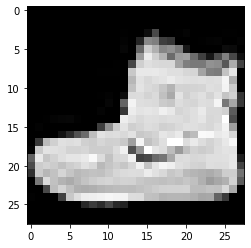

In [32]:
plt.imshow(x_train_all[0], cmap="gray")
plt.show()

#### 타깃의 내용과 의미 확인하기
- 타깃(y_target_all)의 크기는 60,000개의 요소를 가진 1차원 배열입니다.
- 이 배열에는 0~9까지의 정수로 이루어진 클래스 레이블이 들어 있습니다.

In [33]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


- 레이블 0부터 9까지의 의미는 다음과 같습니다.

In [0]:
class_names = ["티셔츠/윗도리", "바지", "스웨터", "드레스", "코트", "샌들", "셔츠", "스니커즈", "가방", "앵클부츠"]

- class_names 리스트를 사용하면 y_train_all에 들어 있는 원소가 어떤 레이블을 의미하는지 숫자가 아닌 이름으로 알아볼 수 있습니다.

In [35]:
print(class_names[y_train_all[0]])

앵클부츠


#### 타깃 분포 확인하기
- 넘파이 bincount() 함수를 사용하면 배열에 있는 정수값의 등장 횟수를 세어 정수값에 해당하는 인덱스 위치에 저장합니다.

In [36]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

- 훈련 데이터 세트를 훈련 세트(train set)와 검증 세트(validation set)로 나누기

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [38]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (48000, 28, 28)
y_train: (48000,)
x_val: (12000, 28, 28)
y_val: (12000,)


In [39]:
print(np.bincount(y_train))
print(np.bincount(y_val))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


- **`Keras`**의 **`to_categorical()`** 함수를 사용하여 One-hot encoding

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [43]:
y_train[0]

6

In [44]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### 입력 데이터 준비하기
- CNN의 입력 데이터(이미지)는 컬러 채널이 필요합니다.
- 넘파이의 **`reshape()`** 메서드를 사용하면 마지막 차원을 간단히 추가할 수 있습니다.

In [45]:
x_train.shape

(48000, 28, 28)

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val   = x_val.reshape(-1, 28, 28, 1)

- 준비된 입력 데이터를 확인해보면 마지막 차원이 추가된 것을 볼 수 있습니다.

In [47]:
x_train.shape

(48000, 28, 28, 1)

- 입력 데이터 표준화 전처리하기
  - 입력 데이터는 이미지이므로 0~255 사이의 정수로 픽셀 강도를 표현합니다.
  - 입력 데이터를 255로 나누어 0~1 사이의 값으로 조정합니다.

In [48]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  1],
        [  1],
        [  0],
        [  0],
        [  0],
        [ 25],
        [ 55],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 43],
        [ 24],
        [  0],
        [  0],
        [  0],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  1],
        [  1],
        [  1],
        [  0],
        [ 25],
        [147],
        [189],
        [181],
        [ 96],
        [ 51],
        [ 49],
        [ 55],
        [ 37],
        [ 76],
        [217],
        [172],
        [125],
        [ 20],
        [  0],
        [  2],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  1],
        [  3],
        [  0],
        [ 82],
        [206],
        [202],
        [190],
      

In [0]:
x_train = x_train / 255
x_val   = x_val   / 255

In [50]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.09803922],
        [0.21568627],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16862745],
        [0.09411765],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.00392157],
        [0.00392157],
        [0.        ],
        [0.09803922],
        [0.57647059],
        [0.74117647],
        [0.70980392],
        [0.37647059],
        [0.2       ],
        [0.19215686],
        [0.21568627],
        [0.14509804],
        [0.29803922],
        

### Keras CNN

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

- 합성곱층 쌓기
  - **`Conv2D`** 클래스의 첫 번째 매개변수는 합성곱 커널의 개수입니다.
      - 두 번째 매개변수는 합성곱 커널의 크기로 높이와 너비를 튜플로 전달합니다.
      - 합성곱 커널로는 전형적으로 3X3 또는 5X5 크기를 많이 사용합니다.
      - **`activation`** 매개변수에 렐루 활성화 함수를 지정합니다.
      - 패딩은 세임 패딩을 사용
      - 여기에서는 패션 **`MNIST`** 이미지의 높이와 너비, 컬러 채널이 입력의 크기가 됩니다.

In [0]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))

- 풀링층 쌓기
  - **`MaxPooling2D`** 클래스의 매개변수는 풀링의 높이와 너비를 나타내는 튜플입니다.

In [0]:
conv1.add(MaxPooling2D((2, 2)))

- 완전 연결층(FC, Fully Connected layer)에 주입할 수 있도록 특성 맵 펼치기
  - 완전 연결층에 연결하기 위해 배치 차원을 제외하고 일렬로 펼쳐야 합니다.
  - **`Flatten()`** 클래스로 수행할 수 있습니다.

In [0]:
conv1.add(Flatten())

- 완전 연결층 쌓기
  - 마지막으로 완전 연결층을 추가합니다.
    - 첫 번째 완전 연결층에는 100개의 뉴런을 사용하고 렐루 활성화 함수를 적용합니다.
    - 마지막 출력층에는 10개의 클래스에 대응하는 10개의 뉴런을 사용하고 소프트맥스 활성화 함수를 적용합니다.

In [0]:
conv1.add(Dense(100, activation="relu"))
conv1.add(Dense(10,  activation="softmax"))

- 모델 구조 살펴보기
   - 합성곱층(Conv2D)의 출력 크기는 배치 차원을 제외하고 28 X 28 X 10입니다.
    - 이때 배치 차원이 None인 이유는 배치 입력의 개수는 훈련할 때 전달되는 샘플 개수에 따라 달라지기 때문입니다.
    - 합성곱 커널은 10개를 사용했으므로 마지막 차원이 10입니다.
    - 모델 파라미터의 개수는 전체 가중치의 크기와 커널마다 하나씩 절편을 추가하면 3 X 3 X 1 X 10 + 10 = 100개입니다.
    - 풀링층(MaxPooling2D)과 특성 맵을 완전 연결층에 펼쳐서 주입하기 위해 추가한 Flatten 층에는 가중치가 없습니다.

- 첫 번째 완전 연결층(Dense)에는 1,960개 (14 X 14 X 10)의 입력이 100개의 뉴런에 연결됩니다.
- 가중치는 뉴런마다 하나씩 있으므로 첫 번째 완전 연결층의 가중치 개수는 196,100개(1960 X 100 + 100)입니다.
- 두 번째 완전 연결층(Dense)의 가중치 개수는 1,010개 (100 X 10 + 10)입니다.
- 가중치의 개수를 보면 완전 연결층에 비해 합성곱층의 가중치 개수가 아주 적습니다.
- 그래서 합성곱층을 여러 개 추가해도 학습할 모델 파라미터의 개수가 크게 늘지 않기 때문에 계산 효율성이 좋습니다.

In [57]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


- 모델 훈련하기
  - 다중 분류를 위한 크로스 엔트로피 손실 함수를 사용합니다.
  - 아담은 **`Adaptive Moment Estimation`**을 줄여 만든 이름입니다.
  - 아담은 손실 함수의 값이 최적값에 가까워질수록 학습률을 낮춰 손실 함수의 값이 안정적으로 수렴될 수 있게 해줍니다.

In [0]:
conv1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [59]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data = (x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 27s 553us/sample - loss: 0.4520 - accuracy: 0.8414 - val_loss: 0.3658 - val_accuracy: 0.8703
Epoch 2/20
48000/48000 [==============================] - 26s 540us/sample - loss: 0.3136 - accuracy: 0.8878 - val_loss: 0.2919 - val_accuracy: 0.8952
Epoch 3/20
48000/48000 [==============================] - 26s 538us/sample - loss: 0.2675 - accuracy: 0.9024 - val_loss: 0.2690 - val_accuracy: 0.9053
Epoch 4/20
48000/48000 [==============================] - 26s 541us/sample - loss: 0.2352 - accuracy: 0.9149 - val_loss: 0.2588 - val_accuracy: 0.9076
Epoch 5/20
48000/48000 [==============================] - 26s 538us/sample - loss: 0.2081 - accuracy: 0.9241 - val_loss: 0.2541 - val_accuracy: 0.9090
Epoch 6/20
48000/48000 [==============================] - 26s 542us/sample - loss: 0.1861 - accuracy: 0.9312 - val_loss: 0.2546 - val_accuracy: 0.9122
Epoch 7/20
48000/48000 [====================

- 그래프로 결과 확인하기

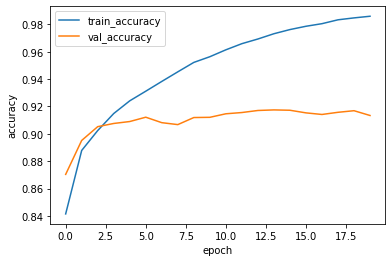

In [60]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

## 드롭아웃(Dropout) 적용
- 드롭아웃을 적용하려면 간단히 **`Dropout`** 클래스를 추가하면 됩니다.
- **`Dropout`** 클래스의 매개변수에 드롭아웃될 비율을 실수로 지정합니다.
- 드롭아웃층에는 학습되는 가중치가 없습니다.
- 단순히 일부 뉴런의 출력을 무작위로 0으로 만들고 나머지 뉴런의 출력을 드롭되지 않은 비율로 나누어 증가시킵니다.

In [0]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation="relu"))
conv2.add(Dense(10, activation="softmax"))

### 드롭아웃층 확인하기
- 드롭아웃층은 훈련되는 가중치가 없고 차원을 바꾸지 않습니다.

In [62]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

- 훈련하기
  - 앞에서 만든 합성곱 신경망 모델과 같은 옵티마이저를 사용하고 20번의 에포크 동안 훈련합니다.

In [63]:
conv2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 576us/sample - loss: 0.5020 - accuracy: 0.8193 - val_loss: 0.3417 - val_accuracy: 0.8776
Epoch 2/20
48000/48000 [==============================] - 27s 568us/sample - loss: 0.3662 - accuracy: 0.8674 - val_loss: 0.2931 - val_accuracy: 0.8969
Epoch 3/20
48000/48000 [==============================] - 28s 587us/sample - loss: 0.3271 - accuracy: 0.8786 - val_loss: 0.2819 - val_accuracy: 0.8978
Epoch 4/20
48000/48000 [==============================] - 27s 567us/sample - loss: 0.3011 - accuracy: 0.8888 - val_loss: 0.2564 - val_accuracy: 0.9075
Epoch 5/20
48000/48000 [==============================] - 27s 564us/sample - loss: 0.2819 - accuracy: 0.8943 - val_loss: 0.2502 - val_accuracy: 0.9091
Epoch 6/20
48000/48000 [==============================] - 27s 566us/sample - loss: 0.2686 - accuracy: 0.9002 - val_loss: 0.2523 - val_accuracy: 0.9081
Epoch 7/20
48000/48000 [====================

그래프로 결과 확인하기

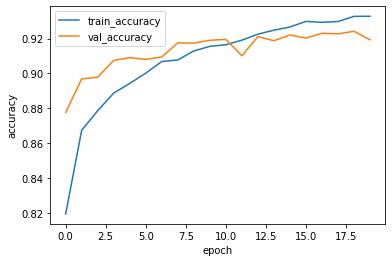

In [65]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()